<img src="https://github.com/dc-aihub/dc-aihub.github.io/blob/master/img/ai-logo-transparent-banner.png?raw=true" 
alt="Ai/Hub Logo"/>

<h1 style="text-align:center;color:#0B8261;"><center>TensorFlow</center></h1>
<h1 style="text-align:center;"><center>Lesson 1</center></h1>
<h1 style="text-align:center;"><center>Simple Linear Model</center></h1>

<hr />

<center><a href="#prep-and-pre-processing">Preparation and Pre-Processing</a></center>

<center><a href="#Data-Dimensions">Data Dimensions</a></center>

<center><a href="#Helper-Image-Plotter">Helper Function for Plotting Images</a></center>

<center><a href="#TensorFlow-Graph">TensorFlow Graph</a></center>

<center><a href="#Placeholder-Variables">Placeholder Variables</a></center>

<center><a href="#Variables-to-Optimize">Variables to Optimize</a></center>

<center><a href="#Model">Model</a></center>

<center><a href="#Cost-Function-to-Optimize">Cost Function to be Optimized</a></center>

<center><a href="#Optimization-Method">Optimization Method</a></center>

<center><a href="#Performance-Measures">Performance Measures</a></center>

<center><a href="#TensorFlow-Run">TensorFlow Run</a></center>

<center><a href="#Helper-Optimization-Iterations">Helper Function for Optimization Iterations</a></center>

<center><a href="#Helper-Show-Performance">Helper Function for Showing Performance</a></center>

<center><a href="#Helper-Model-Weights">Helper Function to Plot Model Weights</a></center>

<center><a href="#Performance-before-Optimizations">Performance over Optimizations</a></center>

<center><a href="#Summary">Summary</a></center>

<center><a href="#Challenge">Challenge</a></center>

<hr />

<center>***Original Tutorial by Magnus Erik Hvass Pedersen:*** <br/>https://github.com/Hvass-Labs/TensorFlow-Tutorials</center>


<div style="background-color:#0B8261; width:100%; height:38px; color:white; font-size:18px; padding:10px;">
OVERVIEW
</div>

<center style="color:#0B8261;">
This tutorial demonstrates the basic workflow of using TensorFlow with a simple linear model. After loading the so-called MNIST data-set with images of hand written digits, we define and optimize a simple mathematical model in TensorFlow. The results are then plotted and discussed.
<br/>
You should be familiar with basic linear algebra, Python and the Jupyter Notebook editor. It also helps if you have a basic understanding of Machine Learning and classification.
</center>

<br/>

<center><b>[Click here to follow along with the video on YouTube](https://www.youtube.com/watch?v=wuo4JdG3SvU&index=2&list=PL9Hr9sNUjfsmEu1ZniY0XpHSzl5uihcXZ)</b></center>

<br/>

<div style="background-color:#D33222; margin-left:10%; width:90%; height:38px; color:white; font-size:18px; padding:10px; float:right;">
NOTE
</div>
>- The MNIST dataset is the "Hello World" dataset of Machine Learning and Deep Learning when it comes to image classification. To summarize, it is a bunch of images of handwritten digits. We'll soon have the opportunity to take a closer look at what some of these images looks like.


<div style="background-color:#0B8261; width:100%; height:38px; color:white; font-size:18px; padding:10px;" id="prep-and-pre-processing">
PREPARATION AND PRE-PROCESSING
</div>

<h3 style="color:#45A046;">Imports</h3>

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix

This was developed using Python 3.6.1 (Anaconda) and TensorFlow version:

In [50]:
tf.__version__

'1.5.0'

<h3 style="color:#45A046;">Load Data</h3>

The MNIST dataset is about 12 MB and will be downloaded automatically if it is not located in the given path.

In [97]:
from tensorflow.examples.tutorials.mnist import input_data

# Setting the one_hot parameter to true will return all the classifications in 0s and 1s (0 is false, 1 is true)
# A one-hot encoded array is a list of 0s with the exception of one value being a 1 where the correct classification is.
data = input_data.read_data_sets("data/MNIST/", one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


The MNIST data-set has now been downloaded and consists of 70,000 images and associated labels (i.e., classfications of images). The dataset if split into 3 mutually exclusive subsets. We will only use the training and test sets in this tutorial.

Let's examine the size of our datasets.

In [52]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels)))
print("- Test-set:\t\t{}".format(len(data.test.labels)))
print("- Validation-set:\t{}".format(len(data.validation.labels)))

Size of:
- Training-set:		55000
- Test-set:		10000
- Validation-set:	5000


<h3 style="color:#45A046;">One-Hot Encoding</h3>

The data-set has been loaded as so-called One-Hot encoding. This means the labels have been converted from a single number to a vector whose length equals the number of possible classes. All elements of the vector are zero except for the $i$'th element which is one and means the class is $i$. For example, the One-Hot encoded labels for the first 5 images in the test-set are:

In [53]:
data.test.labels[0:5, :]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

We also need the classes as single numbers for various comparisons and performance measures, so we convert the One Hot encoded vectors to a single number by taking the index of the highest element. 

**Note:** the word 'class' is a keyword used in Python so we need to use the name 'cls' instead.

In [54]:
data.test.cls = np.array([label.argmax() for label in data.test.labels])

We can now see the class for the first five images in the test-set. Compare these to the One-Hot encoded vectors above. For example, the class for the first image is 7, which corresponds to a One-Hot encoded vector where all elements are zero except for the element with index 7.

In [55]:
data.test.cls[0:5]

array([7, 2, 1, 0, 4], dtype=int64)

<div style="background-color:#0B8261; width:100%; height:38px; color:white; font-size:18px; padding:10px;" id="Data-Dimensions">
DATA DIMENSIONS
</div>

The data dimensions are used in several places in the source-code below. In computer programming it is generally best to use variables and constants rather than having to hard-code specific numbers every time that number is used. This means the numbers only have to be changed in one single place. Ideally these would be inferred from the data that has been read, but here we just write the numbers.

In [56]:
# We know that MNIST images are 28 pixels in each dimension.
img_size = 28

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# Number of classes, one class for each of 10 digits.
num_classes = 10

<div style="background-color:#0B8261; width:100%; height:38px; color:white; font-size:18px; padding:10px;" id="Helper-Image-Plotter">
HELPER FUNCTION FOR PLOTTING IMAGES
</div>

Function used to plot 9 images in a 3x3 grid, and writing the true and predicted classes below each image.

Remember, these functions are only being made to visualize what's going on with the model. They will be very helpful in understanding what the model is thinking, which will help strengthen your understanding of how things work. Although it is not necessary for you to understand what's going on with this code, I suggest taking some time to understand why it works. Matplotlib is very useful in developing and visualizing models.

In [57]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

<h3 style="color:#45A046;">Plot a few images to see if the data is correct.</h3>

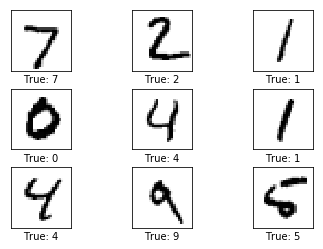

In [58]:
# Get the first images from the test-set.
images = data.test.images[0:9]

# Get the true classes for those images.
cls_true = data.test.cls[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

We can see from the above that this is a quick glimpse of how the data we will be working with looks like. Observe the two last images - the model might struggle with these ones as they kind of look odd. Let's continue forward and see what we come up with.

<div style="background-color:#0B8261; width:100%; height:38px; color:white; font-size:18px; padding:10px;" id="TensorFlow-Graph">
TENSORFLOW GRAPH
</div>

The entire purpose of TensorFlow is to have a so-called computational graph that can be executed much more efficiently than if the same calculations were to be performed directly in Python. TensorFlow can be more efficient than NumPy because TensorFlow knows the entire computation graph that must be executed, while NumPy only knows the computation of a single mathematical operation at a time.

TensorFlow can also automatically calculate the gradients that are needed to optimize the variables of the graph so as to make the model perform better. This is because the graph is a combination of simple mathematical expressions so the gradient of the entire graph can be calculated using the chain-rule for derivatives.

TensorFlow can also take advantage of multi-core CPUs as well as GPUs - and Google has even built special chips just for TensorFlow which are called TPUs (Tensor Processing Units) and are even faster than GPUs.

>A TensorFlow graph consists of the following parts which will be detailed below:

>* Placeholder variables used to change the input to the graph.
>* Model variables that are going to be optimized so as to make the model perform better.
>* The model which is essentially just a mathematical function that calculates some output given the input in the placeholder variables and the model variables.
>* A cost measure that can be used to guide the optimization of the variables.
>* An optimization method which updates the variables of the model.

In addition, the TensorFlow graph may also contain various debugging statements e.g. for logging data to be displayed using TensorBoard, which is not covered in this tutorial.

<div style="background-color:#0B8261; width:100%; height:38px; color:white; font-size:18px; padding:10px;" id="Placeholder-Variables">
PLACEHOLDER VARIABLES
</div>

Placeholder variables serve as the input to the graph that we may change each time we execute the graph. We call this feeding the placeholder variables and it is demonstrated further below.

First we define the placeholder variable for the input images. This allows us to change the images that are input to the TensorFlow graph. This is a so-called tensor, which just means that it is a multi-dimensional vector or matrix. The data-type is set to `float32` and the shape is set to `[None, img_size_flat]`, where `None` means that the tensor may hold an arbitrary number of images with each image being a vector of length `img_size_flat`.

In [59]:
x = tf.placeholder(tf.float32, [None, img_size_flat])

Next we have the placeholder variable for the true labels associated with the images that were input in the placeholder variable `x`. The shape of this placeholder variable is `[None, num_classes]` which means it may hold an arbitrary number of labels and each label is a vector of length `num_classes` which is 10 in this case.

In [60]:
y_true = tf.placeholder(tf.float32, [None, num_classes])

Finally we have the placeholder variable for the true class of each image in the placeholder variable `x`. These are integers and the dimensionality of this placeholder variable is set to `[None]` which means the placeholder variable is a one-dimensional vector of arbitrary length.

In [61]:
y_true_cls = tf.placeholder(tf.int64, [None])

<div style="background-color:#0B8261; width:100%; height:38px; color:white; font-size:18px; padding:10px;" id="Variables-to-Optimize">
VARIABLES TO BE OPTIMIZED
</div>

Apart from the placeholder variables that were defined above and which serve as feeding input data into the model, there are also some model variables that must be changed by TensorFlow so as to make the model perform better on the training data.

The first variable that must be optimized is called `weights` and is defined here as a TensorFlow variable that must be initialized with zeros and whose shape is `[img_size_flat, num_classes]`, so it is a 2-dimensional tensor (or matrix) with `img_size_flat` rows and `num_classes` columns.

In [62]:
weights = tf.Variable(tf.zeros([img_size_flat, num_classes]))

The second variable that must be optimized is called `biases` and is defined as a 1-dimensional tensor (or vector) of length `num_classes`.

In [63]:
biases = tf.Variable(tf.zeros([num_classes]))

<div style="background-color:#0B8261; width:100%; height:38px; color:white; font-size:18px; padding:10px;" id="Model">
MODEL
</div>

This simple mathematical model multiplies the images in the placeholder variable `x` with the `weights` and then adds the `biases`.

The result is a matrix of shape `[num_images, num_classes]` because `x` has shape `[num_images, img_size_flat]` and `weights` has shape `[img_size_flat, num_classes]`, so the multiplication of those two matrices is a matrix with shape `[num_images, num_classes]` and then the `biases` vector is added to each row of that matrix.

**Note:** that the name `logits` is typical TensorFlow terminology, but other people may call the variable something else. This is just the name of the results before it has been run through the activation function. In this case here, we see that we're matrix multiplying the inputs by the weights, then adding the biases.

In [64]:
logits = tf.matmul(x, weights) + biases

Now `logits` is a matrix with `num_images` rows and `num_classes` columns, where the element of the $i$'th row and $j$'th column is an estimate of how likely the $i$'th input image is to be of the $j$'th class.

However, these estimates are a bit rough and difficult to interpret because the numbers may be very small or large, so we want to normalize them so that each row of the `logits` matrix sums to one, and each element is limited between zero and one. This is calculated using the so-called softmax function and the result is stored in `y_pred`.

In [65]:
y_pred = tf.nn.softmax(logits)

The predicted class can be calculated from the `y_pred` matrix by taking the index of the largest element in each row.

The argmax function will take the index of the largest element. We have to feed it `axis=1` to tell it to look for the largest index in each row instead of column. As you probably already guessed, feeding it `axis=0` will tell it to look for the largest value in each column and retrieve the index.

In [66]:
y_pred_cls = tf.argmax(y_pred, axis=1)

<div style="background-color:#D33222; margin-left:10%; width:90%; height:38px; color:white; font-size:18px; padding:10px; float:right;">
NOTE
</div>
>- Just to re-iterate. All we're doing at this point in time is building the TensorFlow graph.
>- Due to this, it's sometimes hard to debug and see what the resulting variables may look like. It's very important you know what's going on at each step. 

<div style="background-color:#0B8261; width:100%; height:38px; color:white; font-size:18px; padding:10px;" id="Cost-Function-to-Optimize">
COST-FUNCTION TO BE OPTIMIZED
</div>

To make the model better at classifying the input images, we must somehow change the variables for `weights` and `biases`. To do this we first need to know how well the model currently performs by comparing the predicted output of the model `y_pred` to the desired output `y_true`.

The cross-entropy is a performance measure used in classification. The cross-entropy is a continuous function that is always positive and if the predicted output of the model exactly matches the desired output then the cross-entropy equals zero. The goal of optimization is therefore to minimize the cross-entropy so it gets as close to zero as possible by changing the `weights` and `biases` of the model.

TensorFlow has a built-in function for calculating the cross-entropy. 

<div style="background-color:#D33222; margin-left:10%; width:90%; height:38px; color:white; font-size:18px; padding:10px; float:right;">
NOTE
</div>
>- The `softmax_cross_entropy_with_logits` function takes the logits instead of the predictions. The reason this is the case is because it needs to pre-activated values for the Backpropagation formula. We learned this in the final few lessons of the AI bootcamp.

In [67]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_true)

We have now calculated the cross-entropy for each of the image classifications so we have a measure of how well the model performs on each image individually. But in order to use the cross-entropy to guide the optimization of the model's variables we need a single scalar value, so we simply take the average of the cross-entropy for all the image classifications.

In [68]:
cost = tf.reduce_mean(cross_entropy)

<div style="background-color:#0B8261; width:100%; height:38px; color:white; font-size:18px; padding:10px;" id="Optimization-Method">
OPTIMIZATION METHOD
</div>

Now that we have a cost measure that must be minimized, we can then create an optimizer. In this case it is the basic form of Gradient Descent where the step-size is set to 0.5.

Note that optimization is not performed at this point. In fact, nothing is calculated at all, we just add the optimizer-object to the TensorFlow graph for later execution.

In [69]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

<div style="background-color:#0B8261; width:100%; height:38px; color:white; font-size:18px; padding:10px;" id="Performance-Measures">
PERFORMANCE MEASURES
</div>

We need a few more performance measures to display the progress to the user.

This is a vector of booleans whether the predicted class equals the true class of each image.

In [70]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)

This calculates the classification accuracy by first type-casting the vector of booleans to floats, so that False becomes 0 and True becomes 1, and then calculating the average of these numbers.

In [71]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

<div style="background-color:#0B8261; width:100%; height:38px; color:white; font-size:18px; padding:10px;" id="TensorFlow Run">
TENSORFLOW RUN
</div>

<h3 style="color:#45A046;">Create TensorFlow Session</h3>

Once the TensorFlow graph has been created, we have to create a TensorFlow session which is used to execute the graph.

Think of the following code as your entry point. It tells TensorFlow to get started and build a blank graph. We'll start populating our graph with the code we developed before in a few moments. 

In [72]:
session = tf.Session()

<h3 style="color:#45A046;">Initialize Variables</h3>

The variables for `weights` and `biases` must be initialized before we start optimizing them.

In [73]:
session.run(tf.global_variables_initializer())

<div style="background-color:#0B8261; width:100%; height:38px; color:white; font-size:18px; padding:10px;" id="Helper-Optimization-Iterations">
HELPER-FUNCTION TO PERFORM OPTIMIZATION ITERATIONS
</div>

There are 50.000 images in the training-set. It takes a long time to calculate the gradient of the model using all these images. We therefore use Stochastic Gradient Descent which only uses a small batch of images in each iteration of the optimizer.

Think of this as breaking the data into more manageable chunks. We'll build our model, feed it a few samples (batch_size), optimize it, then begin feeding it the next set.

In [74]:
batch_size = 100

Function for performing a number of optimization iterations so as to gradually improve the `weights` and `biases` of the model. In each iteration, a new batch of data is selected from the training-set and then TensorFlow executes the optimizer using those training samples.

In [75]:
def optimize(num_iterations):
    for i in range(num_iterations):
        # Get a batch of training examples.
        # x_batch now holds a batch of images and
        # y_true_batch are the true labels for those images.
        x_batch, y_true_batch = data.train.next_batch(batch_size)
        
        # Put the batch into a dict with the proper names
        # for placeholder variables in the TensorFlow graph.
        # Note that the placeholder for y_true_cls is not set
        # because it is not used during training.
        feed_dict_train = {x: x_batch,
                           y_true: y_true_batch}

        # Run the optimizer using this batch of training data.
        # TensorFlow assigns the variables in feed_dict_train
        # to the placeholder variables and then runs the optimizer.
        session.run(optimizer, feed_dict=feed_dict_train)

<div style="background-color:#0B8261; width:100%; height:38px; color:white; font-size:18px; padding:10px;" id="Helper-Show-Performance">
HELPER-FUNCTION TO SHOW PERFORMANCE
</div>

Dict with the test-set data to be used as input to the TensorFlow graph. Note that we must use the correct names for the placeholder variables in the TensorFlow graph.

<div style="background-color:#D33222; margin-left:10%; width:90%; height:38px; color:white; font-size:18px; padding:10px; float:right;">
NOTE
</div>
>- It is always a good idea with any model you build to develop some sort of testing throughout the training. This will allow you to see whether your model is performing better or worse as time goes on.

In [76]:
feed_dict_test = {x: data.test.images,
                  y_true: data.test.labels,
                  y_true_cls: data.test.cls}

Function for printing the classification accuracy on the test-set.

In [77]:
def print_accuracy():
    # Use TensorFlow to compute the accuracy.
    acc = session.run(accuracy, feed_dict=feed_dict_test)
    
    # Print the accuracy.
    # This prints it to 1 decimal place.
    print("Accuracy on test-set: {0:.1%}".format(acc))

Function for printing and plotting the confusion matrix using scikit-learn.

In [78]:
def print_confusion_matrix():
    # Get the true classifications for the test-set.
    cls_true = data.test.cls
    
    # Get the predicted classifications for the test-set.
    cls_pred = session.run(y_pred_cls, feed_dict=feed_dict_test)

    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)

    # Print the confusion matrix as text.
    print(cm)

    # Plot the confusion matrix as an image.
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

    # Make various adjustments to the plot.
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

Function for plotting examples of images from the test-set that have been mis-classified.

In [79]:
def plot_example_errors():
    # Use TensorFlow to get a list of boolean values
    # whether each test-image has been correctly classified,
    # and a list for the predicted class of each image.
    correct, cls_pred = session.run([correct_prediction, y_pred_cls],
                                    feed_dict=feed_dict_test)

    # Negate the boolean array.
    incorrect = (correct == False)
    
    # Get the images from the test-set that have been
    # incorrectly classified.
    images = data.test.images[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = data.test.cls[incorrect]
    
    # Plot the first 9 images.
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

<div style="background-color:#0B8261; width:100%; height:38px; color:white; font-size:18px; padding:10px;" id="Helper-Model-Weights">
HELPER-FUNCTION TO PLOT MODEL WEIGHTS
</div>

Function for plotting the `weights` of the model. 10 images are plotted, one for each digit that the model is trained to recognize.

In [80]:
def plot_weights():
    # Get the values for the weights from the TensorFlow variable.
    w = session.run(weights)
    
    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(w)
    w_max = np.max(w)

    # Create figure with 3x4 sub-plots,
    # where the last 2 sub-plots are unused.
    fig, axes = plt.subplots(3, 4)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Only use the weights for the first 10 sub-plots.
        if i<10:
            # Get the weights for the i'th digit and reshape it.
            # Note that w.shape == (img_size_flat, 10)
            image = w[:, i].reshape(img_shape)

            # Set the label for the sub-plot.
            ax.set_xlabel("Weights: {0}".format(i))

            # Plot the image.
            ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')

        # Remove ticks from each sub-plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

<div style="background-color:#0B8261; width:100%; height:38px; color:white; font-size:18px; padding:10px;" id="Performance-before-Optimizations">
PERFORMANCE BEFORE OPTIMIZATIONS
</div>

Let's take a look at how the model we created performs before actually running any sort of training.

The accuracy on the test set is 9.8%. This is because the model has only been initialized and not optimized at all, so it always predicts that the image shows a zero digit, as demonstrated in the plot below, and it turns out that 9.8% of the images in the test-set happens to be zero digits.

In [81]:
print_accuracy()

Accuracy on test-set: 9.8%


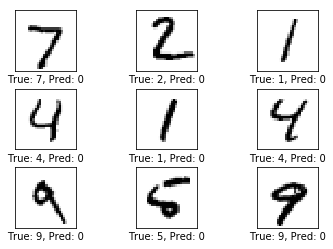

In [82]:
plot_example_errors()

<div style="background-color:#0B8261; width:100%; height:38px; color:white; font-size:18px; padding:10px;">
PERFORMANCE AFTER 1 ITERATION
</div>

Let's see what happens when we train our model for just 1 epoch.

Already after a single optimization iteration, the model has increased its accuracy on the test set to 24.7% up from 9.8%. This means that it mis-classifies the images about 6 out of 10 times, as demonstrated on a few examples below.

In [83]:
optimize(num_iterations=1)

In [84]:
print_accuracy()

Accuracy on test-set: 27.6%


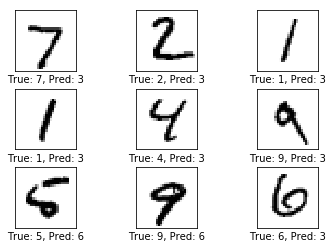

In [85]:
plot_example_errors()

But what actually went wrong? At this point, we can't really see why the model is not predicting so well. I mean, other than the fact that we haven't trained it much, it would also be helpful to see where the model is going right and where it's going wrong.

<br/><hr/>

The weights can also be plotted as shown below. Positive weights are red and negative weights are blue. These weights can be intuitively understood as image-filters.

For example, the weights used to determine if an image shows a zero-digit have a positive reaction (red) to an image of a circle, and have a negative reaction (blue) to images with content in the centre of the circle.

Similarly, the weights used to determine if an image shows a one-digit react positively (red) to a vertical line in the centre of the image, and react negatively (blue) to images with content surrounding that line.

<br/>

<div style="background-color:#D33222; margin-left:10%; width:90%; height:38px; color:white; font-size:18px; padding:10px; float:right;">
NOTE
</div>
>- The weights mostly look like the digits they're supposed to recognize. This is because only one optimization iteration has been performed so the weights are only trained on 100 images.
>- After training on several thousand images, the weights become more difficult to interpret because they have to recognize many variations of how digits can be written.

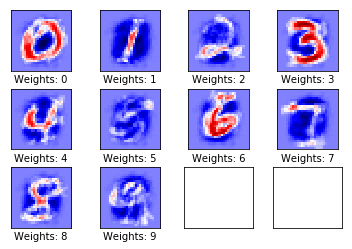

In [86]:
plot_weights()

<div style="background-color:#0B8261; width:100%; height:38px; color:white; font-size:18px; padding:10px;">
PERFORMANCE AFTER 10 ITERATIONS
</div>

Let's see what happens after 10 round of optimization

In [87]:
# We have already performed 1 iteration.
optimize(num_iterations=9)

In [88]:
print_accuracy()

Accuracy on test-set: 78.7%


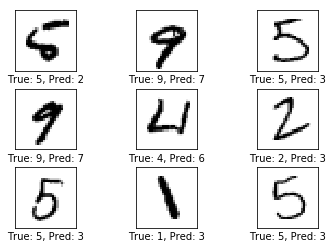

In [89]:
plot_example_errors()

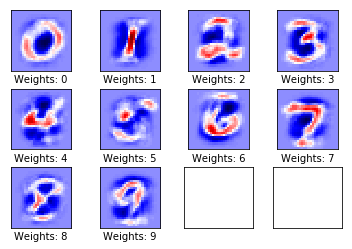

In [90]:
plot_weights()

Okay, looking quite a bit better now! We might actually be able to use this in production. Let's see how it performs with some more optimization!

<div style="background-color:#0B8261; width:100%; height:38px; color:white; font-size:18px; padding:10px;">
PERFORMANCE AFTER 1000 ITERATIONS
</div>

After 1000 optimization iterations, the model only mis-classifies about one in ten images. As demonstrated below, some of the mis-classifications are justified because the images are very hard to determine with certainty even for humans, while others are quite obvious and should have been classified correctly by a good model. But this simple model cannot reach much better performance and more complex models are therefore needed.

In [91]:
# We have already performed 10 iterations.
optimize(num_iterations=990)

In [92]:
print_accuracy()

Accuracy on test-set: 91.8%


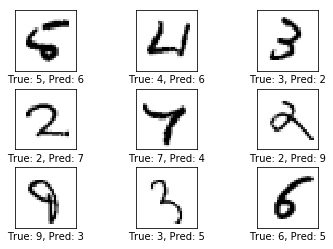

In [93]:
plot_example_errors()

The model has now been trained for 1000 optimization iterations, with each iteration using 100 images from the training-set. Because of the great variety of the images, the weights have now become difficult to interpret and we may doubt whether the model truly understands how digits are composed from lines, or whether the model has just memorized many different variations of pixels.

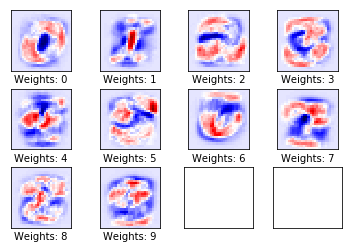

In [94]:
plot_weights()

We can also print and plot the so-called confusion matrix which lets us see more details about the misclassifications. For example, it shows that images actually depicting a 5 have sometimes been mis-classified as all other possible digits, but mostly either 3, 6 or 8.

[[ 954    0    1    2    0   10   10    1    2    0]
 [   0 1109    2    2    0    2    4    2   14    0]
 [   9    8  897   18   10    4   16   13   48    9]
 [   3    1   12  919    0   30    4   10   25    6]
 [   1    3    3    1  903    1   17    4   10   39]
 [   9    4    1   41    6  766   19    5   34    7]
 [   9    3    4    2    9   14  911    2    4    0]
 [   2   10   23    8    7    1    0  946    3   28]
 [   6    9    4   17    8   33   10    9  872    6]
 [  10    9    2   10   22    9    0   33   12  902]]


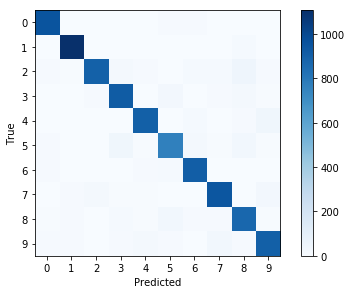

In [95]:
print_confusion_matrix()

Observing the above matrix, we can see that where the boxes are darker in color, it means that's what the model predicted. To read this confusion matrix, the number on the left must line up with the number on the bottom. For example, we can see that for most of the instances, 3 always lines up with 3 - meaning that 3 mostly gets predicted as 3. What's odd with 3 is that you can see that the model sometimes predicted 2 and 5 instead of 3. This makes a little bit of sense as the structure for 5 and 2 when written can get very close to looking like 3!

We are now done using TensorFlow, so we close the session to release its resources.

In [96]:
# This can be commented out in case you want to modify and experiment
# with the Notebook without having to restart it.
session.close()

<div style="background-color:#0B8261; width:100%; height:38px; color:white; font-size:18px; padding:10px;">
SUMMARY
</div>

These are a few suggestions for exercises that may help improve your skills with TensorFlow. It is important to get hands-on experience with TensorFlow in order to learn how to use it properly.

You may want to backup this Notebook before making any changes.

1. Change the learning-rate for the optimizer.
2. Change the optimizer to e.g. `AdagradOptimizer` or `AdamOptimizer`.
3. Change the batch-size to e.g. 1 or 1000.
4. How do these changes affect the performance?

<br/><br/>

<div style="background-color:#0B8261; width:100%; height:38px; color:white; font-size:18px; padding:10px;">
CHALLENGE
</div>

1. Do you think these changes will have the same effect (if any) on other classification problems and mathematical models?
2. Do you get the exact same results if you run the Notebook multiple times without changing any parameters? Why or why not?
3. Change the function `plot_example_errors()` so it also prints the `logits` and `y_pred` values for the mis-classified examples.
4. Use `sparse_softmax_cross_entropy_with_logits` instead of `softmax_cross_entropy_with_logits`. This may require several changes to multiple places in the source-code. Discuss the advantages and disadvantages of using the two methods.
5. Remake the program yourself without looking too much at this source-code.
6. Explain to a friend how the program works.

<div style="background-color:#0B8261; width:100%; height:38px; color:white; font-size:18px; padding:10px;">
LICENSE (MIT)
</div>

Copyright (c) 2016 by [Magnus Erik Hvass Pedersen](http://www.hvass-labs.org/)

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.